In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
def convert_string_to_int(s):
    return int(s.replace(',',''))

def convert_yes_no(s):
    if s =='YES':
        return True
    elif s == 'NO':
        return False
    elif pd.isnull(s):
        return np.nan
    raise ValueError

def process_csv(fname):
    df = pd.read_csv(fname)
    df2 = pd.merge(df[df.columns[2:6]].applymap(convert_string_to_int),
             df[df.columns[6:8]].applymap(convert_yes_no),
             left_index = True,right_index=True)
    df2.columns = ['AT','BT','AH','BH','AB','BB']
    df2['Mult'] = df['Multiplier']
    
    df2.loc[0,'AB'] = False
    df2.loc[0,'BB'] = False
    
    df2['AM'] = df2['AB'] * df2['Mult'] + ( 1 - df2['AB']) * 1.0
    df2['BM'] = df2['BB'] * df2['Mult'] + ( 1 - df2['BB']) * 1.0

    df2['AR'] = df2['AH'] / df2['AM'].shift()
    df2['BR'] = df2['BH'] / df2['BM'].shift()
    
    return df2

In [64]:
import statsmodels.api  as sm
import statsmodels.formula.api as smf

In [65]:
import os
df_dict = {}
for name in os.listdir():
    if name.endswith('csv'):
        left,vs,right=name.split('.')[0].split('-')[1].split(' ')[1:]
        vname = f'{left}Vs{right}'
        df = process_csv(name)
        globals()[vname] = df
        df_dict[vname] = df



In [66]:
df_list = []
for df_name,df in df_dict.items():
    for X in ['A','B']:
        name = df_name+'As'+df_name.split('Vs')[0 if X == 'A' else 1]
        ddf = pd.DataFrame(dict(logrv = np.log(list(df[1:][X+'R'])), # some strange bug occur if call np.log directly
                                bonus = df[X+'B'].shift()[1:],
                                time = range(1,46)))
        ddf['name'] = name
        df_list.append(ddf)


In [67]:
df = pd.concat(df_list)

In [68]:
model = smf.ols('logrv ~ name +  C(bonus) + C(time)',data = df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logrv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sun, 08 Jul 2018   Prob (F-statistic):          5.83e-238
Time:                        11:25:32   Log-Likelihood:                 27.718
No. Observations:                 540   AIC:                             58.56
Df Residuals:                     483   BIC:                             303.2
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         16.7640      0.078    213.630      0.000      16.610      16.918
name[T.EphraimVsLyonAsLyon]       -1.0374      0.053    -19.584      0.000      -1.141      -0.933
name[T.HardinVsSigurdAsHardin]     0.1109      0.052      2.147      0.032       0.009       0.212
name[T.HardinVsSigurdAsSigurd]     0.4839      0.051      9.441      0.000       0.383       0.585
name[T.IkeVsZelgiusAsIke]          0.4478      0.051      8.738      0.000       0.347       0.548
name[T.IkeVsZelgiusAsZelgius]     -0.6169      0.052    -11.759      0.000      -0.720      -0.514
name[T.LyonVsIkeAsIke]             1.2982      0.051     25.335      0.000       1.198       1.399
name[T.LyonVsIkeAsLyon]            0.0558      0.053      1.054      0.292      -0.048       0.160
name[T.MarthVsHardinAsHardin]     -0.6427      0.052    -12.446      0.000      -0.744      -0.541
name[T.MarthVsHardinAsMarth]      -0.4045      0.051     -7.883      0.000      -0.505      -0.304
name[T.SigurdVsArvisAsArvis]      -1.1021      0.053    -20.909      0.000      -1.206      -0.999
name[T.SigurdVsArvisAsSigurd]     -0.3738      0.051     -7.292      0.000      -0.475      -0.273
C(bonus)[T.True]                   1.2399      0.024     51.296      0.000       1.192       1.287
C(time)[T.2]                       0.0715      0.100      0.715      0.475      -0.125       0.268
C(time)[T.3]                       0.2592      0.100      2.593      0.010       0.063       0.456
C(time)[T.4]                       0.3647      0.100      3.648      0.000       0.168       0.561
C(time)[T.5]                       0.4298      0.100      4.299      0.000       0.233       0.626
C(time)[T.6]                       0.6432      0.100      6.435      0.000       0.447       0.840
C(time)[T.7]                       0.7266      0.100      7.269      0.000       0.530       0.923
C(time)[T.8]                       0.6802      0.100      6.805      0.000       0.484       0.877
C(time)[T.9]                       0.6186      0.100      6.202      0.000       0.423       0.815
C(time)[T.10]                      0.5088      0.100      5.090      0.000       0.312       0.705
C(time)[T.11]                      0.4363      0.100      4.375      0.000       0.240       0.632
C(time)[T.12]                      0.4016      0.100      4.027      0.000       0.206       0.598
C(time)[T.13]                      0.3217      0.100      3.225      0.001       0.126       0.518
C(time)[T.14]                      0.3932      0.100      3.934      0.000       0.197       0.590
C(time)[T.15]                      0.5769      0.100      5.771      0.000       0.380       0.773
C(time)[T.16]                      0.6501      0.100      6.504      0.000       0.454       0.847
C(time)[T.17] 

In [69]:
sigma = np.sqrt(res.mse_resid)
sigma

0.24304894090077125

In [70]:
a = np.exp(res.params['Intercept'])
a

19077794.545179877

In [71]:
bonus = {False:1.0,True:np.exp(res.params['C(bonus)[T.True]'])}
bonus

{False: 1.0, True: 3.4551891430684236}

In [72]:
time = {i:np.exp(res.params[f'C(time)[T.{i}]']) for i in range(2,46)}
time[1] = 1.0
time

{1: 1.0,
 2: 1.0741378913294433,
 3: 1.295866618087283,
 4: 1.4400640625406806,
 5: 1.5368783354069948,
 6: 1.9026023207341458,
 7: 2.068025787622871,
 8: 1.9741967200562727,
 9: 1.8562543070818855,
 10: 1.6633001037029773,
 11: 1.54695412340533,
 12: 1.4942616453631625,
 13: 1.379430466681431,
 14: 1.4817032177895326,
 15: 1.7805092941189538,
 16: 1.9157966753081135,
 17: 1.7173878121704855,
 18: 1.5363931401927338,
 19: 1.598340286607526,
 20: 1.7630209318237142,
 21: 1.8352405302461576,
 22: 1.4220516088139272,
 23: 1.361140042527706,
 24: 1.3443816223802239,
 25: 2.263974654148134,
 26: 2.0492740876958595,
 27: 2.014562777289451,
 28: 2.0455072904365736,
 29: 2.140030482949336,
 30: 2.3962876005350275,
 31: 2.8176888006599934,
 32: 2.944968506869714,
 33: 2.14594034023668,
 34: 1.882317679707194,
 35: 1.607505696075166,
 36: 1.59312341452239,
 37: 1.8124083188811178,
 38: 1.8736727373101456,
 39: 2.2384262804144477,
 40: 2.584050044017198,
 41: 2.5389317112830643,
 42: 2.1256090826

In [73]:
time_a = np.array([time[i] for i in range(1,46)])

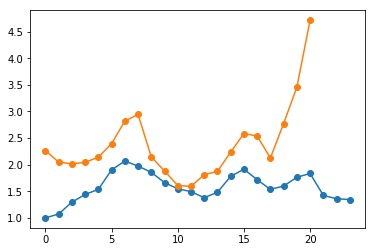

In [74]:

plt.plot(time_a[:24],'o-')
plt.plot(time_a[24:],'o-')
plt.show()

In [75]:
def simulate(base_A, base_B, start_A = 0.0, start_B=0.0, start_turn=1, end_turn=46):
    # In Hardin Vs Sigurd, base_A(Hardin) = exp(0.1109) base_B(Sigurd) = exp(0.4839)
    AT = start_A
    BT = start_B
    
    
    record_list = []
    
    for turn in range(start_turn,end_turn):
        
        mult = 3.0 + 0.1 * turn
        
        if AT - BT <0 and abs(AT - BT) > AT * 0.01:
            AB = True
        else:
            AB = False
        if BT - AT <0 and abs(BT - AT) > BT * 0.01:
            BB = True
        else:
            BB = False
        
        epsilon_A = np.exp(np.random.randn() * sigma)
        epsilon_B = np.exp(np.random.randn() * sigma)
        
        AR = a * base_A * time[turn] * bonus[AB] * epsilon_A
        BR = a * base_B * time[turn] * bonus[BB] * epsilon_B
        
        AM = mult if AB else 1.0
        BM = mult if BB else 1.0
        
        AH = AR * AM
        BH = BR * BM
        
        AT += AH
        BT += BH
        
        record = {'Mult': mult, 
                  'AB':AB, 'BB':BB,
                  'AR':AR, 'BR':BR,
                  'AM':AM, 'BM':BM,
                  'AH':AH, 'BH':BH,
                  'AT':AT, 'BT':BT}
        record_list.append(record)
        
    df = pd.DataFrame(record_list)
    df[['Mult','AB','BB']] = df[['Mult','AB','BB']].shift(-1) # align to origin table format
    
    return df

def simulate_with_head(base_A, base_B, start_A = 0.0, start_B=0.0, start_turn=1, end_turn=46, before=None):
    df_sim_after = simulate(base_A, base_B, 
                            start_A = start_A, start_B=start_B, 
                            start_turn = start_turn, end_turn = end_turn)
    if before is None:
        df_sim_before = df_dict['HardinVsSigurd'][:1] 
    else:
        df_sim_before = before
    df_sim = pd.concat([df_sim_before, df_sim_after],ignore_index =True)
    return df_sim

In [76]:
def examine_trace(df, name = None):
    plt.plot(df['AT'] - df['BT'])
    #plt.plot(df['AT']*0.01)
    #plt.plot(-df['BT']*0.01)
    plt.plot(-df['AT']*0.01)
    plt.plot(df['BT']*0.01)
    if name is not None:
        plt.title('total vote for '+name)
    plt.show()
    
    plt.plot(df['AR'])
    plt.plot(df['BR'])
    if name is not None:
        plt.title('raw vote for '+name)
    plt.show()

In [77]:
def predict_prob_win_A(base_A, base_B, *args, step=1000, **kwargs):
    sim_f = lambda :simulate(base_A, base_B, *args, **kwargs)
    
    AF_list = []
    BF_list = []

    for i in range(1000):
        df = sim_f()

        AF = list(df['AT'])[-1]
        BF = list(df['BT'])[-1]

        AF_list.append(AF)
        BF_list.append(BF)
        
    return np.mean((np.array(AF_list) - np.array(BF_list)) >0)

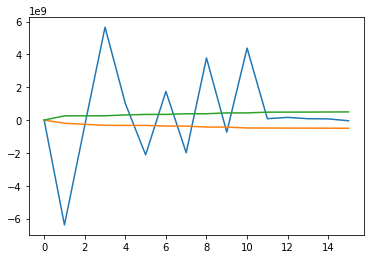

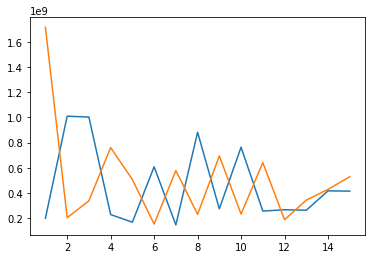

In [78]:
examine_trace(simulate_with_head(np.exp(1.5906), np.exp(1.6821),
                                 start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46))

In [79]:
df = process_csv('(July 2018) FEH Voting Gauntlet_ Fated Battles - Hardin vs Lyon.csvx')

cutoff = 41
before = df[:cutoff]
before.tail()


,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
36,29449280040,29660784080,166457404,228366202,False,False,6.7,1,1,1.66457e+08,2.28366e+08
37,29614859555,29893491560,165579515,232707480,False,False,6.8,1,1,1.6558e+08,2.32707e+08
38,29796149589,30160083848,181290034,266592288,True,False,6.9,6.9,1,1.8129e+08,2.66592e+08
39,33722432720,30433873522,3926283131,273789674,False,True,7.0,1,7,5.69027e+08,2.7379e+08
40,34024613034,37751385112,302180314,7317511590,True,False,7.1,7.1,1,3.0218e+08,1.04536e+09


In [80]:
df_name = 'HardinVsLyon'
df = before

_df_list = []
for X in ['A','B']:
    name = df_name+'As'+df_name.split('Vs')[0 if X == 'A' else 1]
    ddf = pd.DataFrame(dict(logrv = np.log(list(df[1:][X+'R'])), # some strange bug occur if call np.log directly
                            bonus = df[X+'B'].shift()[1:],
                            time = range(1,cutoff)))
    ddf['name'] = name
    _df_list.append(ddf)

df = pd.concat(_df_list)

df['bonus_value'] = np.array(list(df['bonus'])) * np.log(bonus[True])
df['time_value'] = np.log(pd.Series(time))[df['time']]
df['logrv_controled'] = df['logrv'] - df['bonus_value'] - df['time_value'] - np.log(a)

df.head()

,bonus,logrv,time,name,bonus_value,time_value,logrv_controled
1,False,18.958187,1,HardinVsLyonAsHardin,0.000000,0.000000,2.194151
2,True,19.684346,2,HardinVsLyonAsHardin,1.239877,0.071518,1.608915
3,False,18.876173,3,HardinVsLyonAsHardin,0.000000,0.259180,1.852958
4,True,19.833261,4,HardinVsLyonAsHardin,1.239877,0.364688,1.464660
5,False,19.066422,5,HardinVsLyonAsHardin,0.000000,0.429753,1.872633


In [81]:
model2 = smf.ols('logrv_controled ~ name -1',data=df)
res2 = model2.fit()
#res3 = res2.get_robustcov_results(cov_type='HAC',maxlags=1)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logrv_controled   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     8.775
Date:                Sun, 08 Jul 2018   Prob (F-statistic):            0.00405
Time:                        11:25:35   Log-Likelihood:                 14.409
No. Observations:                  80   AIC:                            -24.82
Df Residuals:                      78   BIC:                            -20.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
name[HardinVsLyonAsHardin]     1.6115      0.032     49.798      0.000       1.547       1.676
name[HardinVsLyonAsLyon]       1.7470      0.032     53.987      0.000       1.683       1.811
==============================================================================
Omnibus:                        4.830   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.362
Skew:                           0.569   Prob(JB):                        0.113
Kurtosis:                       3.123   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

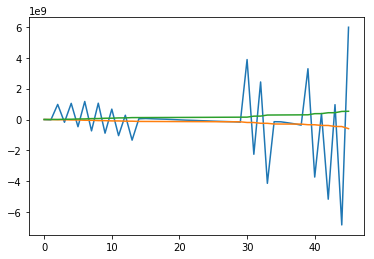

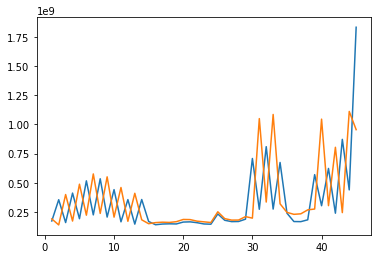

In [82]:
examine_trace(simulate_with_head(np.exp(1.6115), np.exp(1.7470),
                                 start_A = 34024613034.0, start_B=37751385112.0, start_turn=41, end_turn=46, before=before))

In [83]:
predict_prob_win_A(np.exp(1.6115), np.exp(1.7470),
                   start_A = 34024613034.0, start_B=37751385112.0, 
                   start_turn=41, end_turn=46)

0.726

In [84]:
predict_prob_win_A(np.exp(1.6115), np.exp(1.7470),
                   start_A = 34024613034.0, start_B=37751385112.0, 
                   start_turn=41, end_turn=46)

0.699

In [85]:
df = simulate_with_head(np.exp(1.6115), np.exp(1.7470),before = before[:1])
df

,AB,AH,AM,AR,AT,BB,BH,BM,BR,BT,Mult
0,False,0.000000e+00,1,NaN,0.000000e+00,False,0.000000e+00,1,NaN,0.000000e+00,3.1
1,False,9.479799e+07,1,9.4798e+07,9.479799e+07,True,7.329785e+07,1,7.32978e+07,7.329785e+07,3.2
2,True,1.080821e+08,1,1.08082e+08,2.028800e+08,False,1.475700e+09,3.2,4.61156e+08,1.548998e+09,3.3
3,False,1.700785e+09,3.3,5.15389e+08,1.903665e+09,True,2.446984e+08,1,2.44698e+08,1.793697e+09,3.4
4,True,1.331625e+08,1,1.33162e+08,2.036828e+09,False,1.621419e+09,3.4,4.76888e+08,3.415116e+09,3.5
5,False,1.913002e+09,3.5,5.46572e+08,3.949830e+09,True,1.220802e+08,1,1.2208e+08,3.537196e+09,3.6
6,True,1.137101e+08,1,1.1371e+08,4.063540e+09,False,2.342386e+09,3.6,6.50663e+08,5.879581e+09,3.7
7,False,2.699677e+09,3.7,7.29642e+08,6.763216e+09,True,1.578073e+08,1,1.57807e+08,6.037389e+09,3.8
8,True,1.321808e+08,1,1.32181e+08,6.895397e+09,False,2.967172e+09,3.8,7.80835e+08,9.004561e+09,3.9
9,True,2.063919e+09,3.9,5.2921e+08,8.959316e+09,False,1.986825e+08,1,1.98682e+08,9.203244e+09,4.0


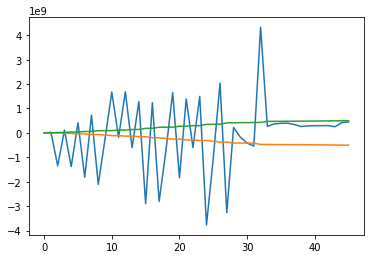

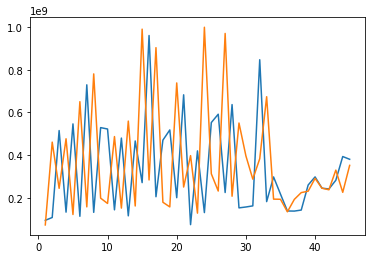

In [86]:
examine_trace(df)

In [87]:
base_A, base_B = np.exp(1.6115), np.exp(1.7470)

for i in range(30,45):
    loc = df.loc[i]
    p=predict_prob_win_A(base_A, base_B,
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46,step=2000)
    print(f'{i}:{p}')


30:0.394
31:0.436
32:0.417
33:0.349
34:0.447
35:0.487
36:0.492
37:0.519
38:0.44
39:0.514
40:0.569
41:0.599
42:0.692
43:0.764
44:0.973


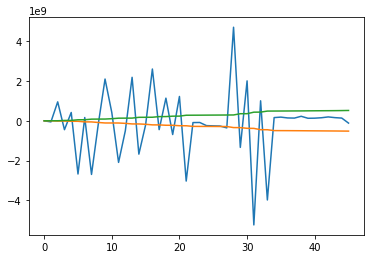

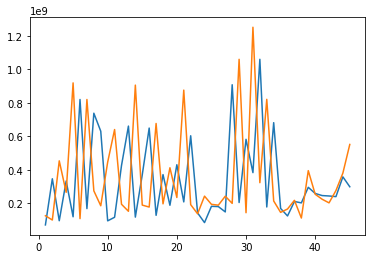

In [88]:
df = simulate_with_head(np.exp(1.6115), np.exp(1.7470),before = before[:1])
examine_trace(df)

In [89]:
base_A, base_B = np.exp(1.6115), np.exp(1.7470)

for i in range(30,45):
    loc = df.loc[i]
    p=predict_prob_win_A(base_A, base_B,
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46,step=2000)
    print(f'{i}:{p}')


30:0.394
31:0.415
32:0.447
33:0.435
34:0.302
35:0.312
36:0.306
37:0.319
38:0.412
39:0.342
40:0.376
41:0.483
42:0.569
43:0.588
44:0.644


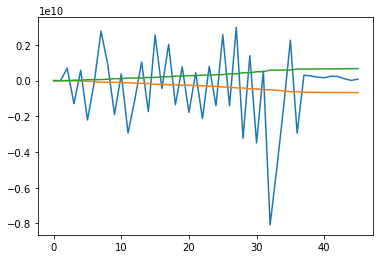

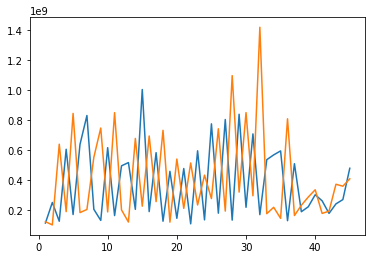

In [90]:
df = simulate_with_head(np.exp(1.6115), np.exp(1.7470),before = before[:1])
examine_trace(df)

In [91]:
base_A, base_B = np.exp(1.6115), np.exp(1.7470)

for i in range(30,45):
    loc = df.loc[i]
    p=predict_prob_win_A(base_A, base_B,
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46,step=2000)
    print(f'{i}:{p}')


30:0.393
31:0.417
32:0.433
33:0.434
34:0.48
35:0.485
36:0.481
37:0.462
38:0.481
39:0.406
40:0.41
41:0.593
42:0.634
43:0.465
44:0.381


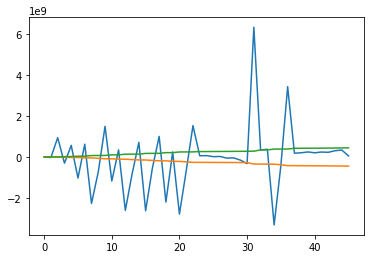

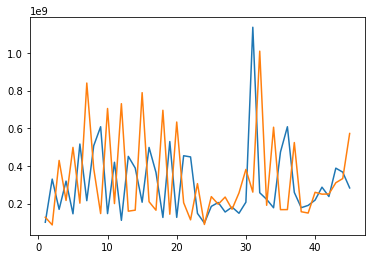

In [92]:
df = simulate_with_head(np.exp(1.6115), np.exp(1.7470),before = before[:1])
examine_trace(df)

In [93]:
base_A, base_B = np.exp(1.6115), np.exp(1.7470)

for i in range(30,45):
    loc = df.loc[i]
    p=predict_prob_win_A(base_A, base_B,
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46,step=2000)
    print(f'{i}:{p}')


30:0.399
31:0.429
32:0.419
33:0.444
34:0.456
35:0.444
36:0.463
37:0.354
38:0.388
39:0.458
40:0.462
41:0.544
42:0.579
43:0.743
44:0.938


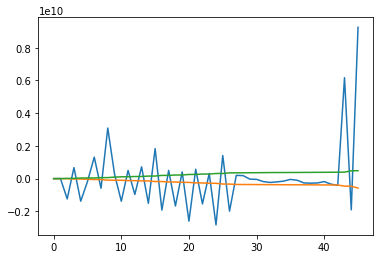

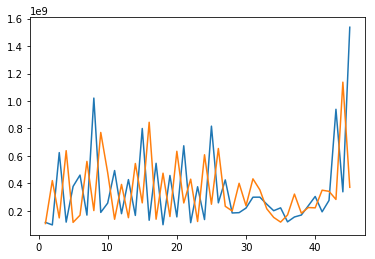

In [94]:
df = simulate_with_head(np.exp(1.6115), np.exp(1.7470),before = before[:1])
examine_trace(df)

In [95]:
base_A, base_B = np.exp(1.6115), np.exp(1.7470)

for i in range(30,45):
    loc = df.loc[i]
    p=predict_prob_win_A(base_A, base_B,
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46,step=2000)
    print(f'{i}:{p}')


30:0.408
31:0.448
32:0.431
33:0.425
34:0.386
35:0.335
36:0.331
37:0.386
38:0.402
39:0.351
40:0.304
41:0.5
42:0.86
43:0.911
44:1.0


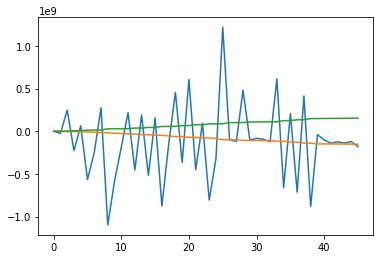

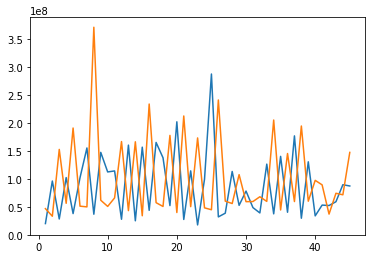

In [96]:
df = simulate_with_head(np.exp(0.1109), np.exp(0.4839),before = before[:1])
examine_trace(df)

In [97]:
base_A, base_B = np.exp(0.1109), np.exp(0.4839)

for i in range(30,45):
    loc = df.loc[i]
    p=predict_prob_win_A(base_A, base_B,
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46,step=2000)
    print(f'{i}:{p}')


30:0.403
31:0.371
32:0.397
33:0.387
34:0.41
35:0.383
36:0.392
37:0.389
38:0.343
39:0.357
40:0.46
41:0.629
42:0.334
43:0.756
44:0.0


In [98]:
base_A_list = []
p_list = []

for i in range(20):
    base_A = np.exp(i * 0.2)
    base_B = np.exp(0.0)
    p = predict_prob_win_A(base_A,base_B)
    base_A_list.append(base_A)
    p_list.append(p)
    print(base_A,p)

1.0 0.525
1.2214027581601699 0.619
1.4918246976412703 0.587
1.822118800390509 0.623
2.225540928492468 0.674
2.718281828459045 0.753
3.320116922736548 0.685
4.055199966844675 0.703
4.953032424395115 0.707
6.0496474644129465 0.772
7.38905609893065 0.805
9.025013499434122 0.814
11.023176380641605 0.88
13.463738035001692 0.835
16.444646771097055 0.898
20.085536923187668 0.911
24.532530197109352 1.0
29.964100047397025 1.0
36.59823444367799 1.0
44.701184493300836 1.0


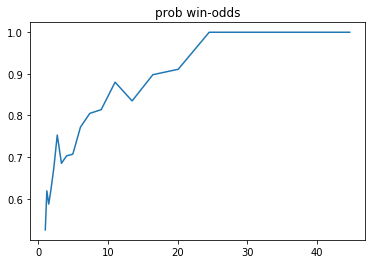

In [99]:
plt.plot(base_A_list,p_list)
plt.title('prob win-odds')
plt.show()